In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Index(['Code', 'Departements', 'Année', 'Taux de chômage'], dtype='object')


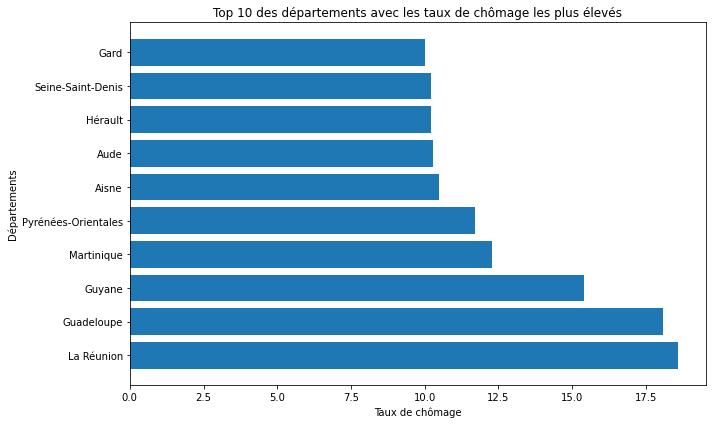

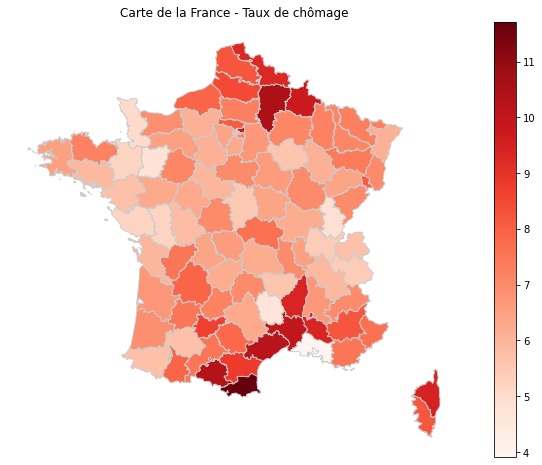

In [7]:
df = pd.read_excel('./data/chomage.xlsx')
df = df.drop(df.index[:4])
df.rename(columns={'Observatoire des territoires - ANCT': 'Code'}, inplace=True)
df.rename(columns={'Unnamed: 1': 'Departements'}, inplace=True)
df['Departements'] = df['Departements'].drop(df.index[-1])
df.rename(columns={'Unnamed: 2': 'Année'}, inplace=True)
df.rename(columns={'Unnamed: 3': 'Taux de chômage'}, inplace=True)

name_departement = df['Departements'].dropna().values
print(df.columns)
rate_unemployment = df['Taux de chômage'].dropna().astype(float).values
rate_unemployment_sorted = np.sort(rate_unemployment)[::-1]

# Trier les taux de chômage de manière décroissante et obtenir les 10 premiers
top_10_unemployment = rate_unemployment[np.argsort(rate_unemployment)][::-1][:10]
top_10_departements = name_departement[np.argsort(rate_unemployment)][::-1][:10]

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(top_10_departements, top_10_unemployment)
plt.xlabel('Taux de chômage')
plt.ylabel('Départements')
plt.title('Top 10 des départements avec les taux de chômage les plus élevés')
plt.tight_layout()

# Afficher le graphique
plt.show()

france = gpd.read_file('./data/departement.geojson')

# Convertir le DataFrame des taux de chômage en GeoDataFrame
df_rates = pd.DataFrame({'Departements': name_departement, 'Taux de chômage': rate_unemployment})
df_rates['Departements'] = df_rates['Departements'].astype(str)
gdf_rates = gpd.GeoDataFrame(df_rates)

# Fusionner les données géographiques avec les taux de chômage en utilisant l'indice (index)
france_with_rates = france.merge(gdf_rates, left_index=True, right_index=True)

# Afficher la carte de la France avec les taux de chômage
fig, ax = plt.subplots(figsize=(12, 8))
france_with_rates.plot(column='Taux de chômage', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Carte de la France - Taux de chômage')
ax.axis('off')


# Afficher le graphique
plt.show()